In [4]:
setwd('C:/Users/benja/bpk Dropbox/Benjamin Kellman/working_dir/projects/GTspecificity/')

load(file='annotation/03_protein_site_stats/glyco_entropy.rda')
# load(file='')
# head(out)
# colnames(out)

In [2]:
out$fish2q = p.adjust(out$fisher_p,'fdr')

Loading required package: ggplot2

Warning message:
"Removed 7752 rows containing missing values or values outside the scale range (`geom_text_repel()`)."
Saving 6.67 x 6.67 in image
Warning message:
"Removed 7752 rows containing missing values or values outside the scale range (`geom_text_repel()`)."


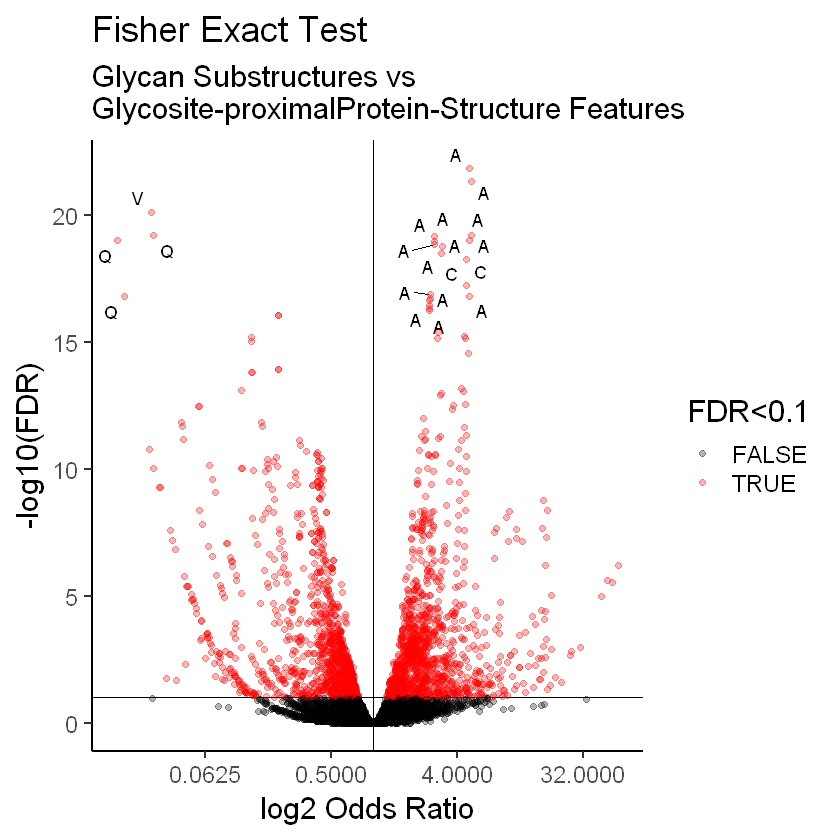

In [3]:
# ggplot(out,aes(y=-log10(p.adjust(fisher_p,'fdr')),x=gvT_gvn_pvT-gvTn/N,color=fish2q<.1))+
#     geom_hline(yintercept = 1)+geom_vline(xintercept = 0)+
#     geom_point(alpha=.01)+#scale_y_log10()+
#     ylab('Pr(glycan_str | protein) - Pr(gly)')+
#     #geom_boxplot(outlier.shape = NA)+
#     scale_color_manual(values=c('black','darkred'))+theme_classic(base_size=18)
library(ggrepel)

vars = c('fisher_OR.odds.ratio','fisher_p','measure')

tmp=unique(out[abs(log10(out$fisher_OR.odds.ratio))<2 & out$fisher_p>0 & out$type!='seq',vars])
tmp$lab = NA #ifelse(tmp$fisher_p<quantile(tmp$fisher_p,prob = 1e-4), paste(tmp$measure),NA)
lab_idx = sample(which(tmp$fisher_p<quantile(p.adjust(tmp$fisher_p,'fdr'),prob = 1e-3)),20)
tmp$lab[lab_idx] = as.character(tmp$measure)[lab_idx]


g=ggplot(tmp,aes(y=-log10(p.adjust(fisher_p,'fdr')),x=fisher_OR.odds.ratio,label=lab))+
    geom_text_repel()+
    geom_hline(yintercept = 1)+geom_vline(xintercept = 1)+
    geom_point(aes(color=p.adjust(fisher_p,'fdr')<.1),alpha=.3)+scale_color_manual(values=c('black','red'),name='FDR<0.1')+
    #geom_bin2d(bins = 60) +scale_fill_continuous(type = "viridis",trans='log10') +
    scale_x_continuous(trans='log2')+
    ylab('-log10(FDR)')+
    xlab('log2 Odds Ratio')+ggtitle('Fisher Exact Test',subtitle = 'Glycan Substructures vs\nGlycosite-proximalProtein-Structure Features')+
    #geom_boxplot(outlier.shape = NA)+
    theme_classic(base_size=18)
g
ggsave(g,filename = 'figures/03.statistical_trends/condProb_KLdivg/FisherExact.png',dpi=300)


In [10]:
write.csv(tmp[,c('fisher_p','fisher_OR.odds.ratio','lab')], 'figures/03.statistical_trends/condProb_KLdivg/FisherExact.csv')
